<a href="https://colab.research.google.com/github/KAILASHVenkat/Signals-project/blob/main/MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MFCC (Mel-Frequency Cepstral Coefficients) is a way to represent the characteristics of sound in a form that computers can understand. It's like taking a "snapshot" of how sounds change over a short period. These snapshots are used for things like recognizing spoken words or classifying different sounds, such as identifying music genres.Here are the steps to calculate MFCC values:



1.   Pre-emphasis: Boost high-frequency components.
2.   Framing: Divide the audio signal into short, overlapping frames.
3.   Windowing: Apply a window function to each frame.
4.   Fast Fourier Transform (FFT): Compute the power spectrum of each frame.
5.   Mel-filter bank: Apply a set of Mel filters to the spectrum.
6.   Logarithm: Take the logarithm of the filter bank outputs.
7.   Discrete Cosine Transform (DCT): Apply DCT to decorrelate the coefficients.
8.   Keep the first N coefficients as the MFCC features.















In [ ]:
!pip install librosa

In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget https://github.com/KAILASHVenkat/Signals-project/raw/main/7383-3-0-0.wav

In [7]:
audio_path = 'https://github.com/KAILASHVenkat/Signals-project/raw/main/7383-3-0-0.wav'
ipd.Audio(audio_path)

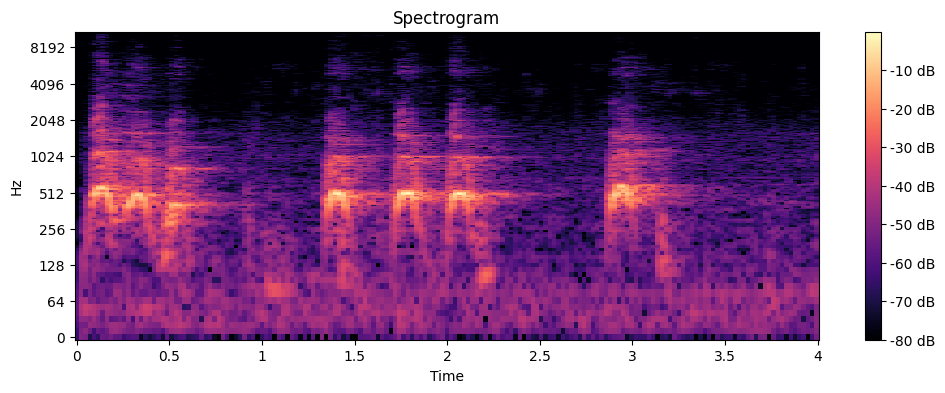

In [8]:
y,sr=librosa.load('7383-3-0-0.wav')
# Set the pre-emphasis coefficient (typically between 0.9 and 1.0)
pre_emphasis_coefficient = 0.97

# Apply pre-emphasis to the audio signal
emphasized_signal = np.append(y[0], y[1:] - pre_emphasis_coefficient * y[:-1])

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Calculate the magnitude and phase of the STFT
magnitude, phase = librosa.magphase(D)

# Visualize the magnitude of the STFT
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

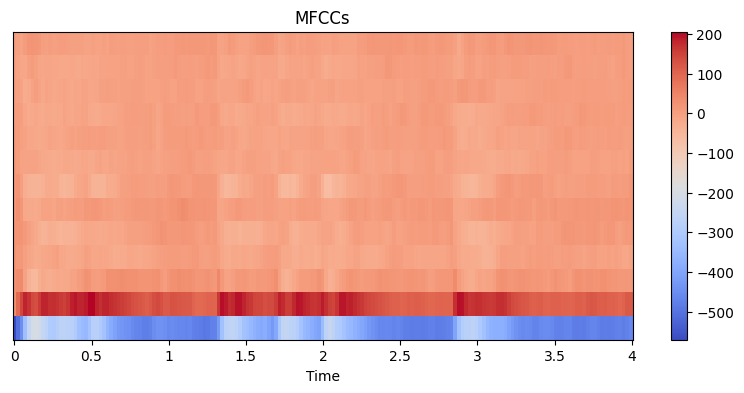

In [9]:
# Calculate the Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()

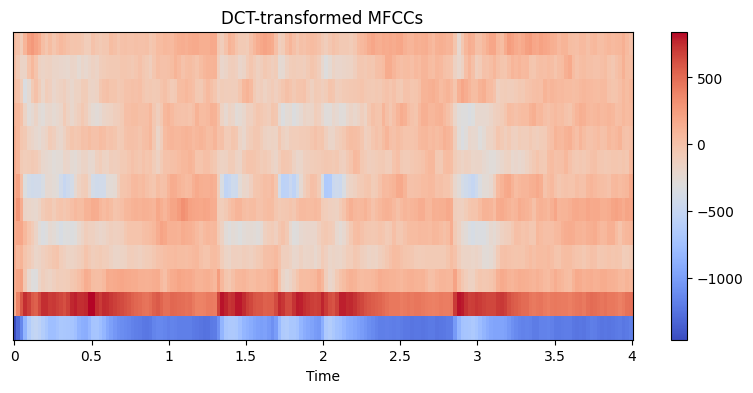

In [32]:
# Perform the Discrete Cosine Transform (DCT) to decorrelate MFCCs
mfccs_dct = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, lifter=22)  # Applying DCT with liftering

# Display the DCT-transformed MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_dct, x_axis='time')
plt.colorbar()
plt.title('DCT-transformed MFCCs')
plt.show()

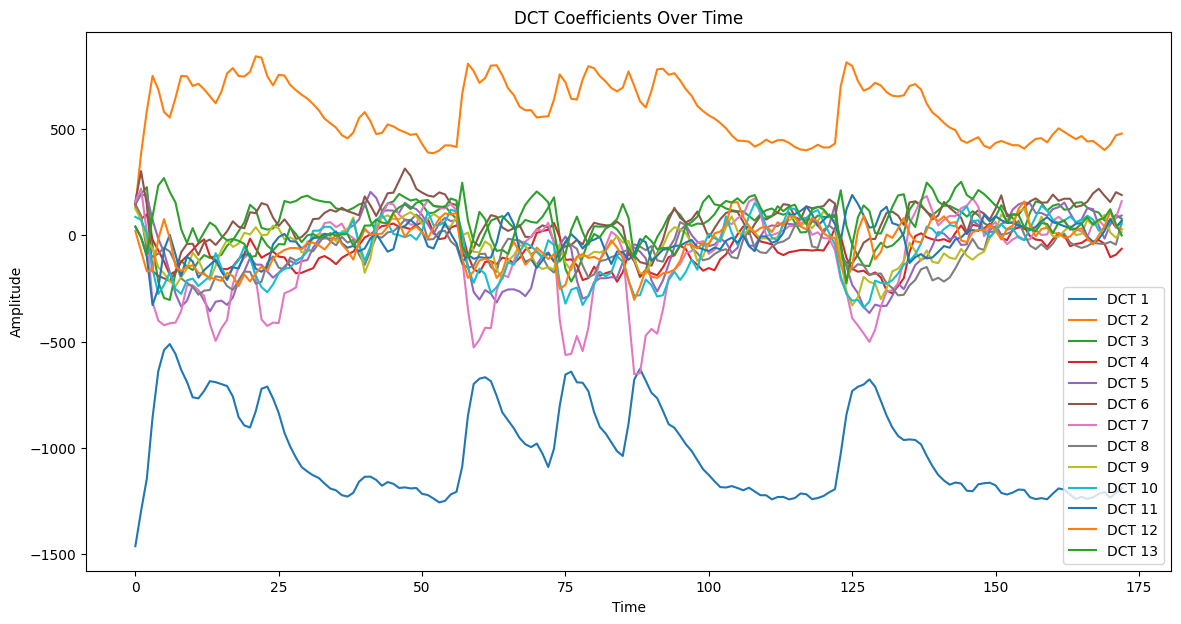

In [35]:
plt.figure(figsize=(14, 7))
for i in range(13):  # 13 MFCC coefficients
    plt.plot(mfccs_dct[i], label=f'DCT {i+1}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('DCT Coefficients Over Time')
plt.legend()
plt.show()